<a href="https://colab.research.google.com/github/Suji04/RIT-DSCI-633-FDS/blob/main/Assignments/DSCI_633_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0: Import usual libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Step 1: Get the data

In [12]:
iris_data = datasets.load_iris()

print("feature names: ", iris_data.feature_names)

X = iris_data.data
print("X shape: ", np.shape(X))

y = iris_data.target
print("y shape: ", np.shape(y))

feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X shape:  (150, 4)
y shape:  (150,)


## Step 2: Data Manipulation and analysis

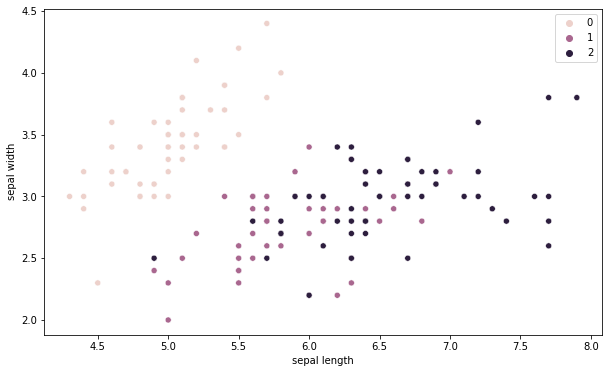

In [13]:
plt.figure(figsize = (10,6))
plt.xlabel("sepal length")
plt.ylabel("sepal width")
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

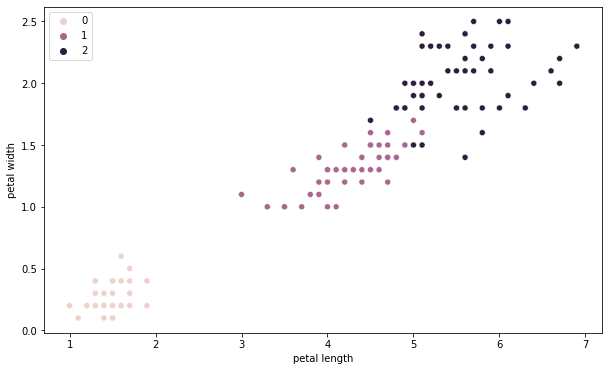

In [14]:
plt.figure(figsize = (10,6))
plt.xlabel("petal length")
plt.ylabel("petal width")
sns.scatterplot(x=X[:,2],y=X[:,3],hue=y)

From the above scatter plots we can see that class 0 is easily distinguishable from the other two classes. But classes 1 and 2 are somewhat similar. 

## Step 3: Divide dataset into Train/Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1924)

## Step 4: Prepare data for ML, data cleaning, Standardization

In [16]:
print("number of missing values in feature matrix: ", np.isnan(X).sum())

number of missing values in feature matrix:  0


In [17]:
print("number of missing values in target vector: ", np.isnan(y).sum())

number of missing values in target vector:  0


No data cleaning is required!

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Train on Linear Support vector Machine

In [19]:
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Compute Error using RMSE

In [20]:
y_pred = model_svm.predict(X_train)
print("RMSE score (train set): ", np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred = model_svm.predict(X_test)
print("RMSE score (test set): ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score (train set):  0.18257418583505536
RMSE score (test set):  0.0


## Compute with RBF kernel functions

In [21]:
model_svm = SVC(kernel="rbf")
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_train)
print("RMSE score (train set): ", np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred = model_svm.predict(X_test)
print("RMSE score (test set): ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score (train set):  0.18257418583505536
RMSE score (test set):  0.0


## Tune SVM hyperparameters by using GridSearchCV with cross validation

In [22]:
model_svm = SVC(random_state=2343)

search_space = {
    "C" : [0.001, 0.01, 0.1, 1],
    "kernel" : ["linear", "poly", "rbf"],
    "gamma" : ["scale", "auto"]
}

GS = GridSearchCV(estimator = model_svm,
                  param_grid = search_space,
                  scoring = ["accuracy"],
                  refit = "accuracy",
                  cv = 10,
                  verbose = 4)

GS.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.500, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.500, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[CV]  C=0.001, gamma=scale, kernel=linear, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=scale, kernel=linear .............................
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.583, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .. C=0.001, gamma=auto, kernel=rbf, accuracy=0.333, total=   0.0s
[CV] C=0.001, gamma=auto, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=2343, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['accuracy'], verbose=4)

## What are your hyperparameter values for C and gamma

In [23]:
print(GS.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


## What is the accuracy score of your model

In [24]:
print("accuracy score (cross validation): ", GS.best_score_)

model_svm = GS.best_estimator_
y_pred = model_svm.predict(X_test)
print("accuracy score (test set): ", accuracy_score(y_test, y_pred))

accuracy score (cross validation):  0.9583333333333334
accuracy score (test set):  1.0


## Train using Nearest neighbor. Start with k=9

In [25]:
model_knn = KNeighborsClassifier(n_neighbors=9)

y_pred = model_svm.predict(X_train)
print("RMSE score (train set): ", np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred = model_svm.predict(X_test)
print("RMSE score (test set): ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score (train set):  0.18257418583505536
RMSE score (test set):  0.0


## Tune the number of k using RandomizedSearchCV

In [26]:
model_knn = KNeighborsClassifier()

distributions = {
    "n_neighbors": [1,3,5,7,9], 
}

RS = RandomizedSearchCV(estimator = model_knn,
                        param_distributions = distributions,
                        n_iter = 4,
                        scoring = ["accuracy"],
                        refit = "accuracy",
                        cv = 10,
                        verbose = 4)

RS.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=1.000, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=1.000, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=0.917, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=1.000, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=0.917, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................... n_neighbors=5, accuracy=0.917, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .................... n_neighbors=9, accuracy=1.000, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, accuracy=0.917, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, accuracy=1.000, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, accuracy=0.917, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, accuracy=0.833, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................... n_neighbors=9, accuracy=0.917, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................... n_neighbors=3, accuracy=1.000, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9]},
                   pre_dispatch='2*n_jobs', random_state=None, refit='accuracy',
                   return_train_score=False, scoring=['accuracy'], verbose=4)

In [27]:
print(RS.best_params_)

{'n_neighbors': 7}


## What is the accuracy of your model

In [28]:
print("accuracy score (cross validation): ", RS.best_score_)

model_knn = RS.best_estimator_
y_pred = model_knn.predict(X_test)
print("accuracy score (test set): ", accuracy_score(y_test, y_pred))

accuracy score (cross validation):  0.9583333333333333
accuracy score (test set):  1.0
